<a href="https://colab.research.google.com/github/DiploDatos/AprendizajePorRefuerzos/blob/master/lab_1_intro_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1: Introducción al aprendizaje por refuerzos
@Diego Tondo

Curso Aprendizaje por Refuerzos, Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2021

In [18]:
#@title Código básico de graficación (no modificar)

import numpy as np
import matplotlib.pyplot as plt
import itertools
import gym

def plot_smoothen_rewards(reward_ep):
    episode_rewards = np.array(reward_ep)

    # se suaviza la curva de convergencia
    episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
    acumulated_rewards = np.cumsum(episode_rewards)

    reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]  
    return reward_per_episode

def plot_reward_per_episode(reward_ep):

    episode_rewards = np.array(reward_ep)

    # se suaviza la curva de convergencia
    episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
    acumulated_rewards = np.cumsum(episode_rewards)

    reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]

    plt.plot(reward_per_episode)
    plt.title('Recompensa acumulada por episodio')
    plt.show()
    
    
def plot_steps_per_episode(timesteps_ep):
    # se muestra la curva de aprendizaje de los pasos por episodio
    episode_steps = np.array(timesteps_ep)
    plt.plot(np.array(range(0, len(episode_steps))), episode_steps)
    plt.title('Pasos (timesteps) por episodio')
    plt.show()
    
    
def plot_steps_per_episode_smooth(timesteps_ep):
    episode_steps = np.array(timesteps_ep)

    # se suaviza la curva de aprendizaje
    episode_number = np.linspace(1, len(episode_steps) + 1, len(episode_steps) + 1)
    acumulated_steps = np.cumsum(episode_steps)

    steps_per_episode = [acumulated_steps[i] / episode_number[i] for i in range(len(acumulated_steps))]

    plt.plot(steps_per_episode)
    plt.title('Pasos (timesteps) acumulados por episodio')
    plt.show()
    

def draw_value_matrix(q):

    n_rows = 4
    n_columns = 12
    n_actions = 4

    # se procede con los cálculos previos a la graficación de la matriz de valor
    q_value_matrix = np.empty((n_rows, n_columns))
    for row in range(n_rows):
        for column in range(n_columns):

            state_values = []

            for action in range(n_actions):
                state_values.append(q.get((row * n_columns + column, action), -100))

            maximum_value = max(state_values)  # determinamos la acción que arroja máximo valor


            q_value_matrix[row, column] = maximum_value

    # el valor del estado objetivo se asigna en -1 (reward recibido al llegar) para que se coloree de forma apropiada
    q_value_matrix[3, 11] = -1

    # se grafica la matriz de valor
    plt.imshow(q_value_matrix, cmap=plt.cm.RdYlGn)
    plt.tight_layout()
    plt.colorbar()

    for row, column in itertools.product(range(q_value_matrix.shape[0]), range(q_value_matrix.shape[1])):

        left_action = q.get((row * n_columns + column, 3), -1000)
        down_action = q.get((row * n_columns + column, 2), -1000)
        right_action = q.get((row * n_columns + column, 1), -1000)
        up_action = q.get((row * n_columns + column, 0), -1000)

        arrow_direction = 'D'
        best_action = down_action

        if best_action < right_action:
            arrow_direction = 'R'
            best_action = right_action
        if best_action < left_action:
            arrow_direction = 'L'
            best_action = left_action
        if best_action < up_action:
            arrow_direction = 'U'
            best_action = up_action
        if best_action == -1:
            arrow_direction = ''

        # notar que column, row están invertidos en orden en la línea de abajo porque representan a x,y del plot
        plt.text(column, row, arrow_direction, horizontalalignment="center")

    plt.xticks([])
    plt.yticks([])
    plt.show()

    print('\n Matriz de mejor acción-valor (en números): \n\n', q_value_matrix)

![](https://github.com/GIDISIA/RLDiplodatos/blob/master/images/cliffwalking.png?raw=1)

donde S= starting point, G= goal

(imagen de Sutton y Barto, 2018)

Descripción del entorno:

Acciones:

* $\uparrow$ - Arriba
* $\downarrow$ - Abajo
* $\rightarrow$ - Derecha
* $\leftarrow$ - Izquierda

Función de recompensa:

* $-1$ en todos los demás estados 
* $-100$ en el acantilado

Nota: caer en el acantilado devuelve al agente al estado inicial en un mismo episodio

# ACTIVIDADES

## 1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".



In [3]:
def choose_action_greedy(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

Definimos el esqueleto del método learn, el cuál toma una transición y cambia el dict de los valores de Q de acuerdo a algún algoritmo.

In [4]:
def learn_sarsa(state, action, reward, next_state, next_action):
    """
    Performs a SARSA update for a given state transition
    """
    
    q[state, action] = q.get((state, action), 0.0) + alpha*((reward + gamma*(q.get((next_state, next_action), 0.0)) - q.get((state, action), 0.0)))
    
    pass

Finalmente, definimos el método principal de iteraciones. 

In [5]:
def run_sarsa():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action_greedy(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action_greedy(next_state)

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn_sarsa(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn_sarsa(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

Definidos los métodos básicos, procedemos a instanciar a nuestro agente.

In [6]:
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

Ya instanciado, ejecutamos nuestro agente

In [7]:
avg_steps_per_episode, timesteps_ep_sarsa, reward_ep_sarsa = run_sarsa()

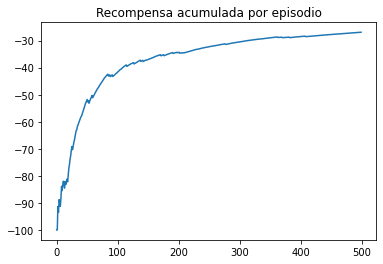

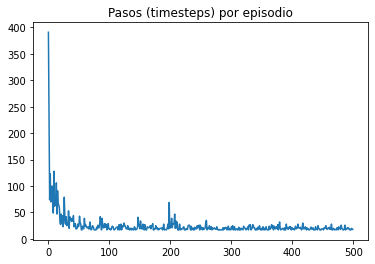

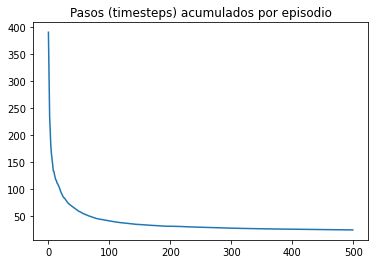

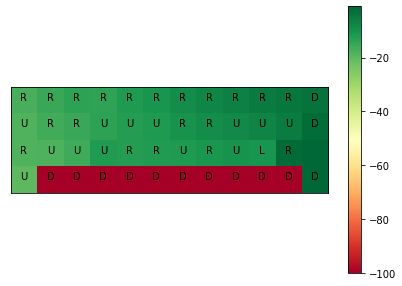


 Matriz de mejor acción-valor (en números): 

 [[ -17.23954428  -15.14316652  -13.47940719  -13.86734791  -11.50591433
   -10.42824021   -8.92910114   -7.36906975   -6.09772006   -5.02260286
    -4.246717     -3.48743802]
 [ -18.17688817  -16.29163152  -15.09887514  -13.57191616  -12.57200446
   -11.46204211  -10.28051994   -8.75636874   -8.02140089   -7.17268501
    -5.41325753   -2.24362335]
 [ -18.16818774  -17.96726471  -16.02741607  -12.12753358  -12.36502775
   -11.94064567  -11.56233996  -10.96253903   -9.96154144  -10.28531687
    -2.00258599   -1.        ]
 [ -19.72790699 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


(None, None, None, None)

In [8]:
plot_reward_per_episode(reward_ep_sarsa), plot_steps_per_episode(timesteps_ep_sarsa), plot_steps_per_episode_smooth(timesteps_ep_sarsa), draw_value_matrix(q)

In [9]:
env.close()

## 2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

In [10]:
def learn_ql(state, action, reward, next_state):
    """
    Performs a Q-LEARNING update for a given state transition
    """
    q_values = [q.get((next_state, a), 0.0) for a in actions]
    max_q = max(q_values)
    
    q[state, action] = q.get((state, action), 0.0) + alpha * ((reward +(gamma * max_q)- q.get((state, action), 0.0)))
    
    return

In [11]:
def run_ql():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action_greedy(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action_greedy(next_state)

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn_ql(state, action, reward, next_state)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn_ql(state, action, reward, next_state)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [12]:
q = {}
avg_steps_per_episode, timesteps_ep_ql, reward_ep_ql = run_ql()

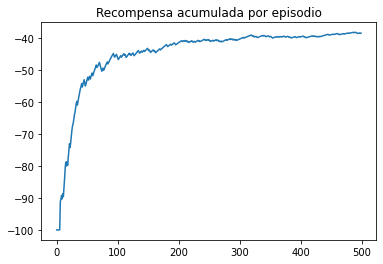

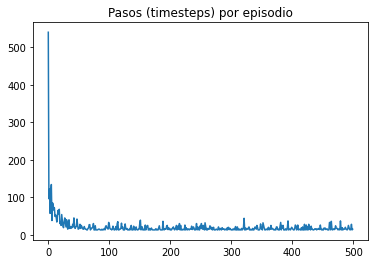

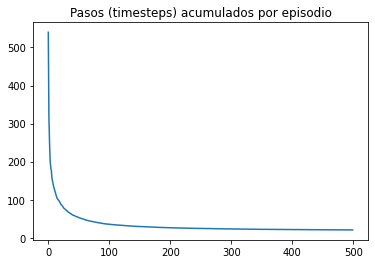

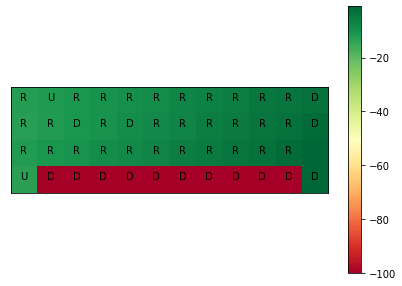


 Matriz de mejor acción-valor (en números): 

 [[ -12.48472403  -11.81064187  -11.00431373  -10.20913198   -9.3641749
    -8.422848     -7.4423576    -6.58166968   -5.69628889   -4.82410143
    -3.9456591    -2.99608014]
 [ -12.95845179  -11.98895659  -10.99756429   -9.99910145   -8.99960434
    -7.99973663   -6.99987299   -5.99996579   -4.99999528   -3.9999984
    -2.9999996    -2.        ]
 [ -12.          -11.          -10.           -9.           -8.
    -7.           -6.           -5.           -4.           -3.
    -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


(None, None, None, None)

In [13]:
plot_reward_per_episode(reward_ep_ql), plot_steps_per_episode(timesteps_ep_ql), plot_steps_per_episode_smooth(timesteps_ep_ql), draw_value_matrix(q)

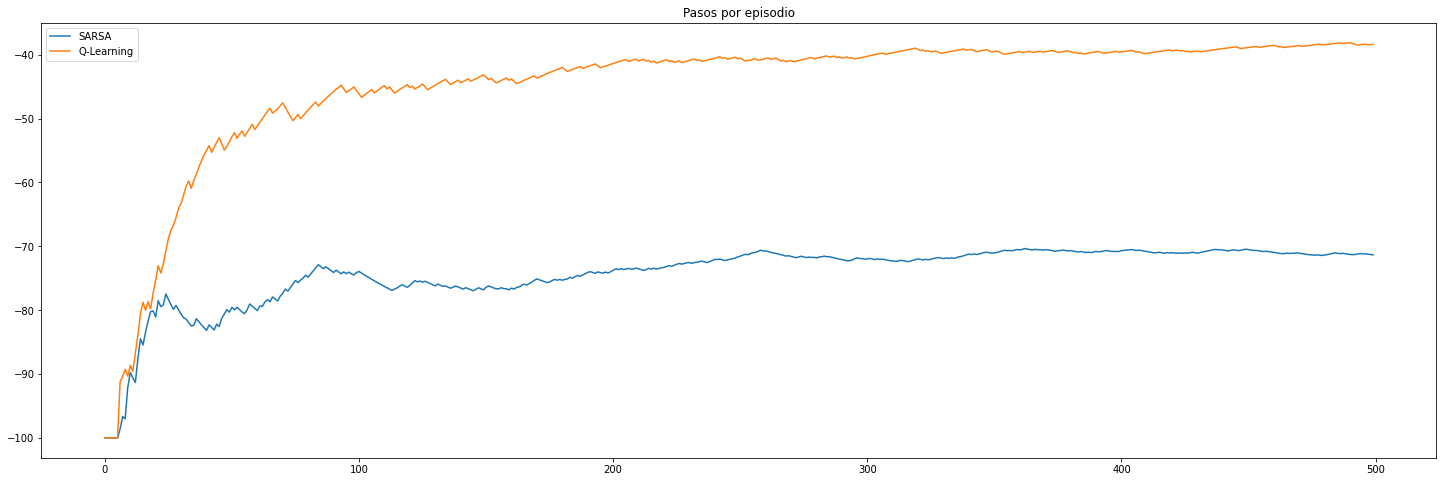

In [30]:
plt.figure(figsize=(25,8))

plt.subplot(1,1,1)
plt.title("Pasos por episodio")
plt.plot(plot_smoothen_rewards(reward_ep_sarsa), label='SARSA')
plt.plot(plot_smoothen_rewards(reward_ep_ql), label='Q-Learning')
plt.legend()

### CONCLUSIONES
1. Q-Learning converge mas rápido que SARSA. Esto se debe a que Q-Learning es un algoritmo off-policy, que busca alcanzar una solución óptima sin exploración intermedia. En cambio, SARSA tiene pasos de exploración en su leaning path.
2. Con SARSA el camino se aleja del óptimo, dado que la política egreedy agrega un factor aleatorio que penaliza caminar cerca del borde, y tiende a cuidar que no caiga. En cambio, con Q-Learning, no importa si cae al borde porque no hay una política que agrege un factor aleatorio en el proceso de aprendizaje. Sería como tener una política egreedy con epsilon = 0. 
3. El reward acumulado con SARSA es mejor que con Q-LEARNING. Esto se debe a que el proceso de aprendizaje tiene una experimentación que considera las acciones de los próximos pasos penalizando la caída, en cambio en Q-LEARNING se busca siempre maximizar Q-Value en la ecuación de update, sin importar la performance del proceso de aprendizaje.

## 3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


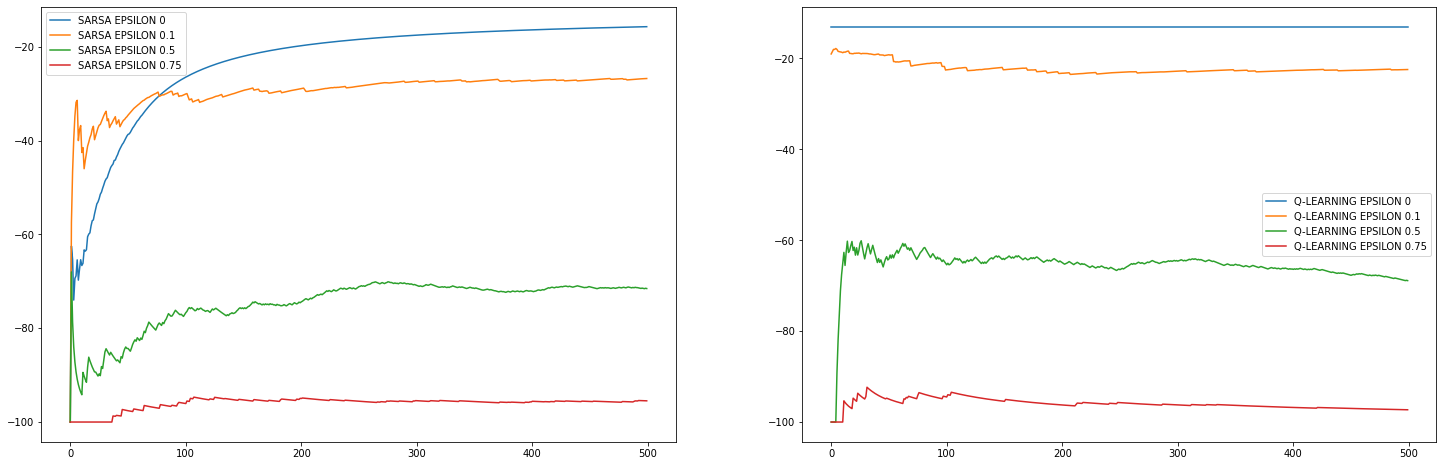

In [38]:
q = {}
alpha = 0.5
gamma = 1
epsilon = 0.1
e = (0, 0.1, 0.5, 0.75)
plt.figure(figsize=(25,8))
plt.subplot(1,1,1)
for epsilon in e:
    plt.subplot(1,2,1)
    env.reset()
    _, timesteps_ep_sarsa, reward_ep_sarsa = run_sarsa()
    plt.plot(plot_smoothen_rewards(reward_ep_sarsa), label= f"SARSA EPSILON {epsilon}" )
    plt.legend()

    plt.subplot(1,2,2)
    env.reset()
    _, timesteps_ep_ql, reward_ep_ql = run_ql()
    plt.plot(plot_smoothen_rewards(reward_ep_ql), label= f"Q-LEARNING EPSILON {epsilon}" )
    plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


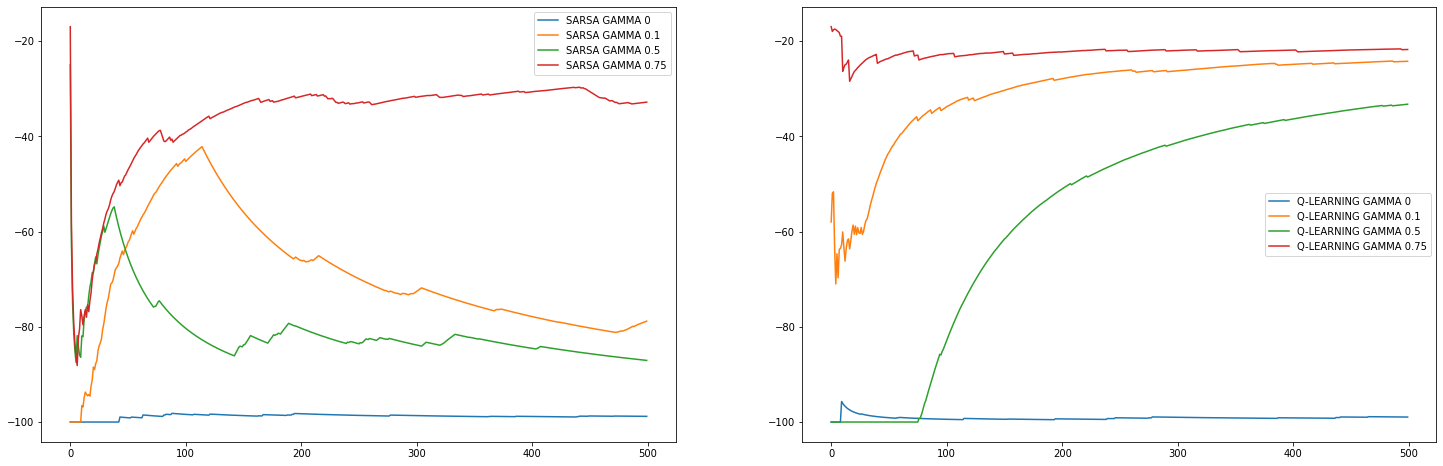

In [39]:
q = {}
alpha = 0.5
gamma = 1
epsilon = 0.1
g = (0, 0.1, 0.5, 0.75)
plt.figure(figsize=(25,8))
plt.subplot(1,1,1)
for gamma in g:
    plt.subplot(1,2,1)
    env.reset()
    _, timesteps_ep_sarsa, reward_ep_sarsa = run_sarsa()
    plt.plot(plot_smoothen_rewards(reward_ep_sarsa), label= f"SARSA GAMMA {gamma}" )
    plt.legend()

    plt.subplot(1,2,2)
    env.reset()
    _, timesteps_ep_ql, reward_ep_ql = run_ql()
    plt.plot(plot_smoothen_rewards(reward_ep_ql), label= f"Q-LEARNING GAMMA {gamma}" )
    plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


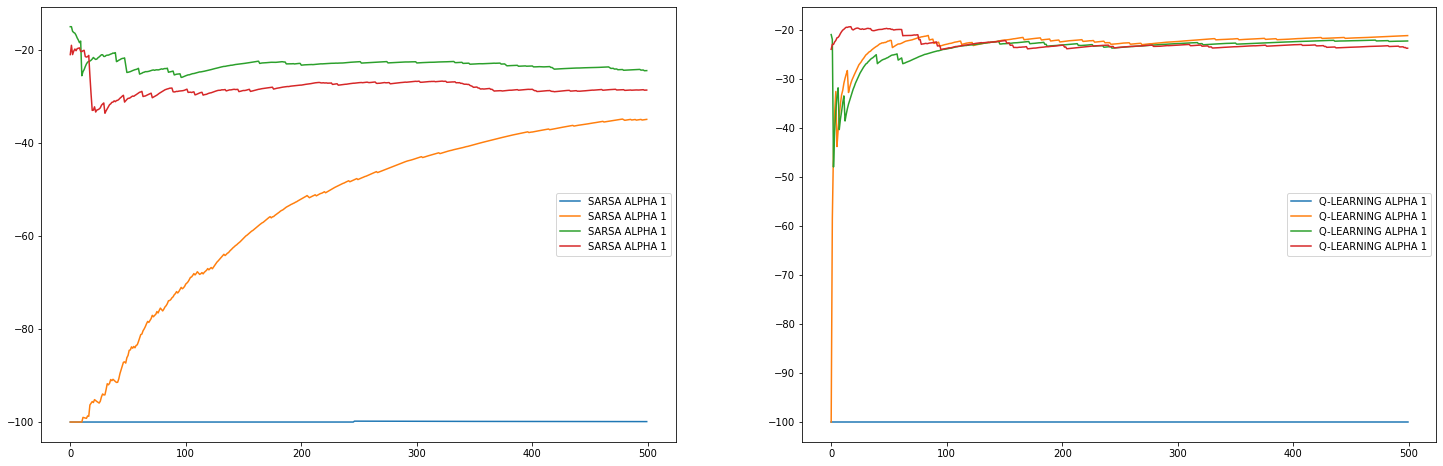

In [40]:
q = {}
alpha = 0.5
gamma = 1
epsilon = 0.1
a = (0, 0.1, 0.5, 0.75)
plt.figure(figsize=(25,8))
plt.subplot(1,1,1)
for alpha in a:
    plt.subplot(1,2,1)
    env.reset()
    _, timesteps_ep_sarsa, reward_ep_sarsa = run_sarsa()
    plt.plot(plot_smoothen_rewards(reward_ep_sarsa), label= f"SARSA ALPHA {gamma}" )
    plt.legend()

    plt.subplot(1,2,2)
    env.reset()
    _, timesteps_ep_ql, reward_ep_ql = run_ql()
    plt.plot(plot_smoothen_rewards(reward_ep_ql), label= f"Q-LEARNING ALPHA {gamma}" )
    plt.legend()

CONCLUSIONES
1. La variable EPSILON nos define el umbral en que el algoritmo toma una decisión aleatoria o toma acción en función del estado. Cuánto mas grande es epsilon, mayor es la cantidad de paso en que se ejecuta una acción aleatoria.
2. La variable GAMMA nos permite definir la importancia que se da al resultado de los próximos pasos. Si es cercano a cero, el algoritmo no puede aprender debido a que desprecia los resultados. 
3. La variable ALPHA define la tasa de aprendizaje, o bien, el peso otorgado en el momento de actualizar Q. 